<a href="https://colab.research.google.com/github/LorisDiotallevi/UniversityProjects/blob/main/Team1_Dependency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dependency measures**

In this project, we explore how the relationships between financial assets change over time. By analyzing three key time periods, the 2008 Financial Crisis, the COVID-19 Pandemic, and Recent Years. We aim to show how market events and economic shifts can affect the way stocks behave in relation to one another.

To study these relationships, we use three different dependency measures:

1) **Pearson Correlation:** Measures linear relationships between variables.

2-3) **Spearman Correlation and Kendall Correlation:** Focus on monotonic relationships (which are not necessarily linear), examining rank-based relationships in two slightly different ways.


By using multiple measures, each capturing dependencies in a unique way, we gain a more comprehensive understanding of how assets interact. This deeper insight is crucial for effective risk management, as it allows us to identify relationships that might not be evident with a single approach. Ultimately, this improves the ability to make informed and diversified investment decisions.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np
import statsmodels.api as sm

In [ ]:
# Let's select the stocks we want to analyze
tickers = ['AAPL', 'TSLA', 'JPM', 'XOM', 'PFE', 'MCD', 'BA', 'AMZN', 'NEM', 'D']

# Download stock data for a broad range covering all periods
data = yf.download(tickers, start="2006-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))['Adj Close']

# Define the time periods
periods = {
    '2008 Crisis': ('2006-01-01', '2013-12-31'),
    'COVID-19 Pandemic': ('2020-01-01', '2021-12-31'),
    'Recent Years': ('2022-01-01', pd.to_datetime('today').strftime('%Y-%m-%d'))
}

[*********************100%***********************]  10 of 10 completed


**Pearson Correlation Coefficient**

The **Pearson correlation coefficient** is a statistical measure that quantifies the strength and direction of the **linear relationship** between two variables.
The Pearson coefficient, denoted by ρ or 𝑟, ranges from -1 to 1:

*   A value of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other increases proportionally.

*   A value of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.

*   A value of 0 suggests no linear relationship between the variables.


The formula for calculating the Pearson correlation coefficient is:

\begin{align}
ρ_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}
\end{align}

Where:



*   ${\text{Cov}(X,Y)}$ is the covariance between the variables X and Y,
*   $\sigma_X$ and $\sigma_Y$ are the standard deviations of X and Y, respectively.

**Key Features:**

*   **Linear Relationship:** Pearson measures how closely the relationship between two variables can be described by a straight line.
*   **Sensitivity to Outliers:** Because it uses means and variances in its calculation, it can be heavily influenced by extreme values.
*  **Assumption of Normality:** It performs best when the variables follow a normal distribution, although it is not strictly required.
















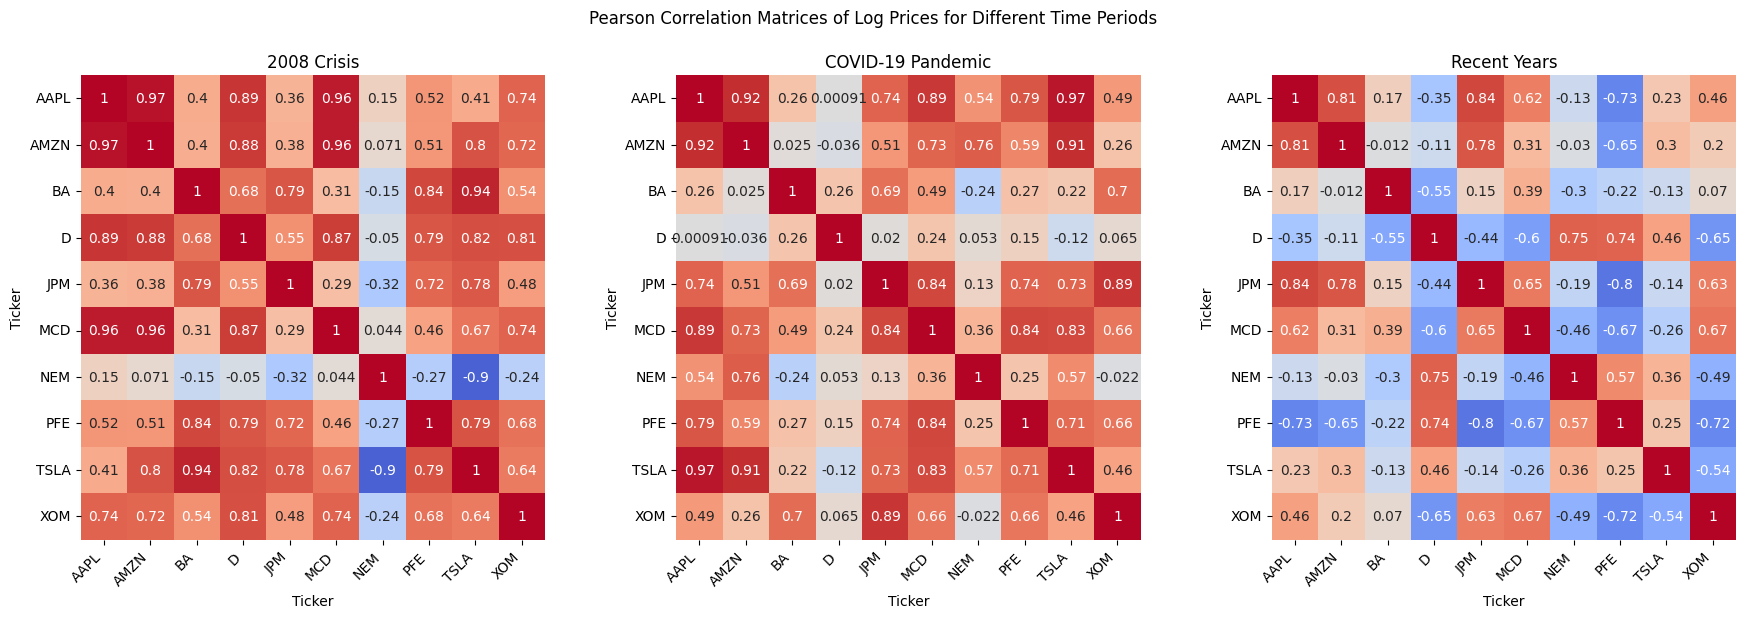

In [ ]:
# Part 1: Log Price Correlations
# Dictionary to hold log price data for each period
log_price_period_data = {}
for period, (start, end) in periods.items():
    log_price_period_data[period] = np.log(data.loc[start:end])  # Take log of prices

# Calculate and plot heatmaps for log price correlations
log_price_correlation_matrices = {period: pdata.corr(method='pearson') for period, pdata in log_price_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Pearson Correlation Matrices of Log Prices for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_price_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

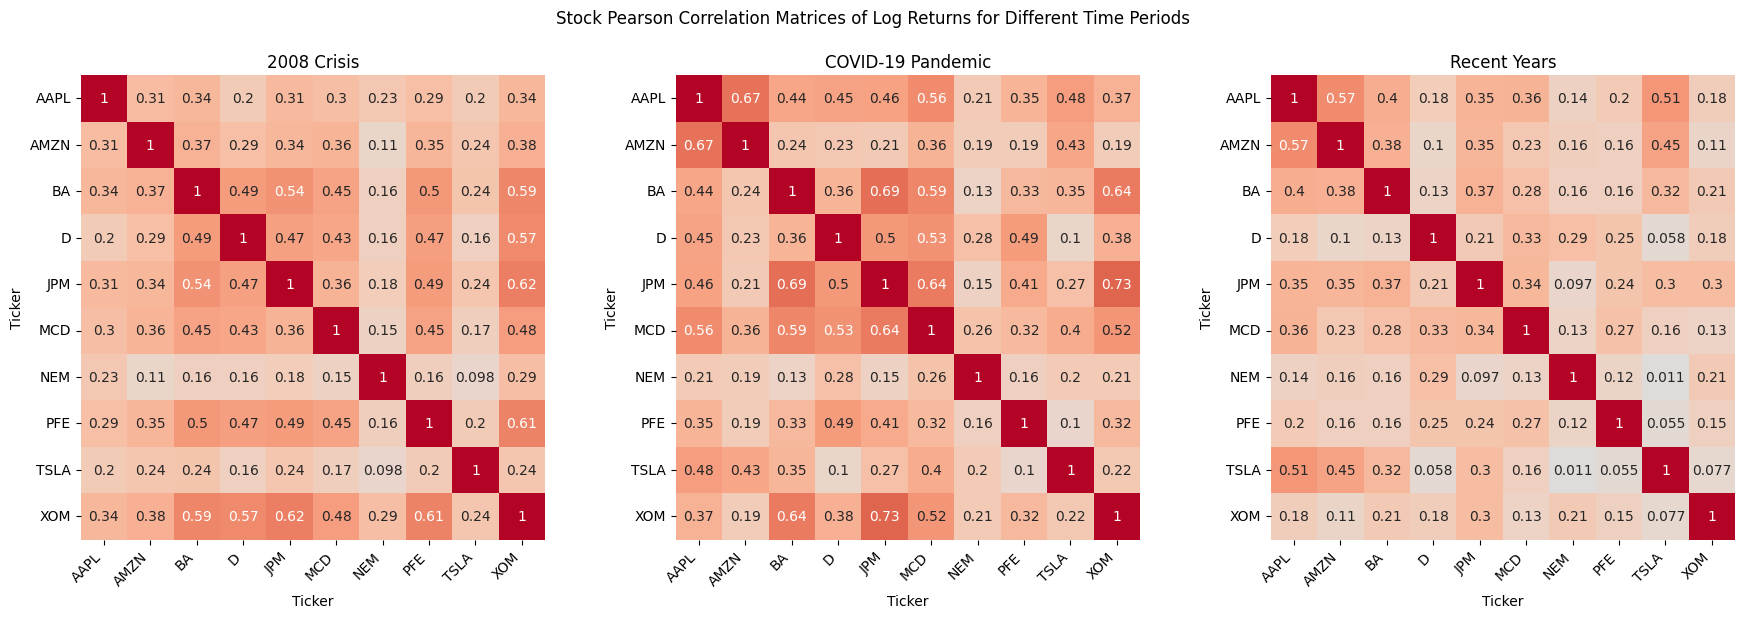

In [ ]:
# Part 2: Log Return Correlations
# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Dictionary to hold log return data for each period
log_return_period_data = {}
for period, (start, end) in periods.items():
    log_return_period_data[period] = log_returns.loc[start:end]

# Calculate and plot heatmaps for log return correlations
log_return_correlation_matrices = {period: pdata.corr(method='pearson') for period, pdata in log_return_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Stock Pearson Correlation Matrices of Log Returns for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_return_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Log Prices vs. Log Returns**

In this analysis, we chose to examine both log returns and log prices to highlight the differences between short-term fluctuations and long-term trends in stock correlations.



*   **Why?**

**Log Prices:** The primary goal of analyzing log-transformed prices is to study the **long-term relationships** between stocks. This focuses on how stock prices evolve over extended periods, helping us understand if their growth (or decline) patterns are connected. Taking the logarithm of stock prices helps standardize them, making it easier to compare stocks with very different price levels. Log prices emphasize relative growth rather than absolute price differences.

**Log Returns:** Analyzing log returns focuses on the **short-term movements** of stocks, often on a daily or intraday basis. This reveals how stocks respond to immediate market events, such as economic announcements, company earnings, or geopolitical events. In the short term, stocks often move in the same direction due to systematic factors (like macroeconomic news or investor sentiment).

Average Absolute Correlations for Log Prices:
2008 Crisis: 0.4434
COVID-19 Pandemic: 0.3420
Recent Years: 0.2935

Average Absolute Correlations for Log Returns:
2008 Crisis: 0.2178
COVID-19 Pandemic: 0.1766
Recent Years: 0.1745


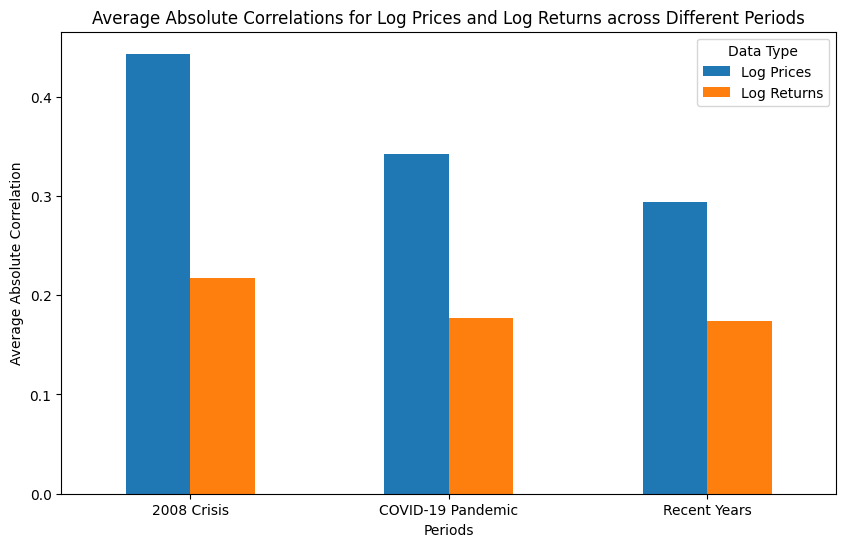

In [ ]:
# Dictionary to store the average correlations for each period
average_correlations = {
    "Log Prices": {},
    "Log Returns": {}
}

# Calculate the average correlation for each period on log prices (absolute values)
for period, corr_matrix in log_price_correlation_matrices.items():
    # Calculate the mean of absolute correlation values, ignoring the diagonal
    abs_corr_values = np.abs(corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)])
    avg_corr = abs_corr_values.mean()
    average_correlations["Log Prices"][period] = avg_corr

# Calculate the average correlation for each period on log returns (absolute values)
for period, corr_matrix in log_return_correlation_matrices.items():
    # Calculate the mean of absolute correlation values, ignoring the diagonal
    abs_corr_values = np.abs(corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)])
    avg_corr = abs_corr_values.mean()
    average_correlations["Log Returns"][period] = avg_corr

# Display the results
print("Average Absolute Correlations for Log Prices:")
for period, avg_corr in average_correlations["Log Prices"].items():
    print(f"{period}: {avg_corr:.4f}")

print("\nAverage Absolute Correlations for Log Returns:")
for period, avg_corr in average_correlations["Log Returns"].items():
    print(f"{period}: {avg_corr:.4f}")

# Create the DataFrame for visualization
df_avg_corr = pd.DataFrame(average_correlations)

# Create a bar chart to compare average correlations across periods
df_avg_corr.plot(kind='bar', figsize=(10, 6))
plt.title("Average Absolute Correlations for Log Prices and Log Returns across Different Periods")
plt.xlabel("Periods")
plt.ylabel("Average Absolute Correlation")
plt.xticks(rotation=0)
plt.legend(title="Data Type")
plt.show()


**Linearity vs Monotonicity**

The scatterplot and local regression (LOESS) of Amazon (AMZN) and Apple (AAPL) log prices during the 2008 crisis highlight an important observation: **while the relationship between the two stocks demonstrates a strong dependency, the relationship is not perfectly linear**. This is evident from the red LOESS curve, which deviates from a straight line in certain regions.

This deviation suggests that while a traditional linear measure such as the Pearson correlation coefficient might capture part of the dependency, it might **not fully describe the relationship.** Here is where **Spearman’s rank correlation and Kendall’s tau** become valuable, as they are designed to capture non-linear but monotonic relationships.

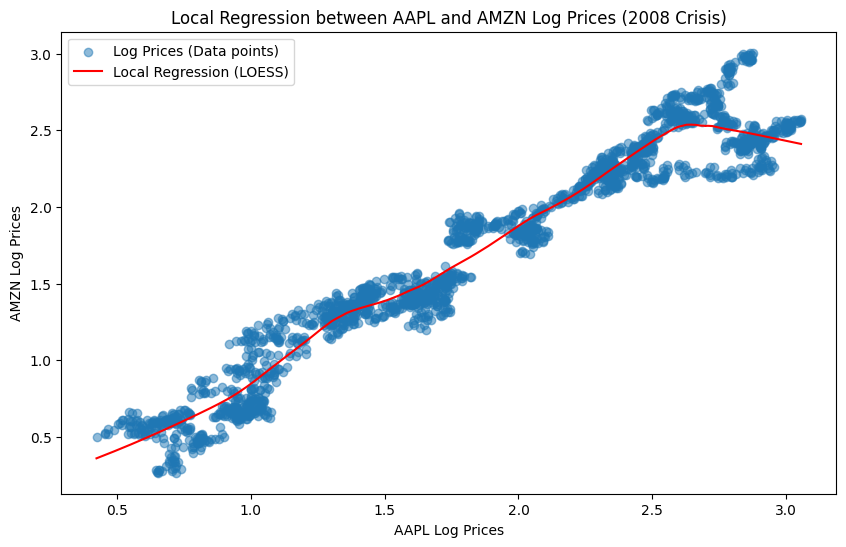

In [ ]:
# Select the period of ‘2008 Crisis’ from log prices
start, end = periods['2008 Crisis']
log_prices_2008_crisis = log_price_period_data['2008 Crisis']

# Select log prices of AAPL and AMZN in the 2008 Crisis period
x = log_prices_2008_crisis['AAPL']
y = log_prices_2008_crisis['AMZN']

# Calculate local regression (LOESS)
lowess = sm.nonparametric.lowess(y, x, frac=0.3)

# Plot data and local regression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Log Prices (Data points)')
plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='Local Regression (LOESS)')
plt.title("Local Regression between AAPL and AMZN Log Prices (2008 Crisis)")
plt.xlabel("AAPL Log Prices")
plt.ylabel("AMZN Log Prices")
plt.legend()
plt.show()

**Spearman’s Rank Correlation Coefficient**


Spearman’s rank correlation coefficient, denoted as ρ, is a non-parametric statistic that measures the strength and direction of a monotonic relationship between two variables. Unlike Pearson’s correlation, which assesses linear relationships and requires normally distributed data, Spearman’s approach is based on ranked data.


**Assumptions**


*   Robustness to outliers
*   Non-Linear Relationships
*   Ordinal Data


**Computation & Formula**


Spearman’s method first converts the values of each variable into ranks. After ranking, the next step involves calculating the difference in ranks for each paired observation between the two variables. For each observation $i$, $d_i$ represents the difference between the rank of $x$ and the rank of $y$.


When data contain tied ranks, the calculation of Spearman’s coefficient must account for these ties to accurately reflect the relationship. The formula for Spearman’s rank correlation coefficient with tied ranks is as follows:



\begin{align}
r_s = \rho_{R(X),R(Y)} = \frac{Cov(R(X), R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}}
\end{align}

\
* $\rho$  denotes the usual Pearson correlation coefficient, but applied to the rank variables.

* $Cov(R(X),R(Y)$ is the covariance of the rank variables,

* $\sigma_{R(X)} \sigma_{R(Y)}$ are the standard deviations of the rank variables.

\
Only if all $n$ ranks are distinct integers, it can be computed using the following formula:

\
\begin{align}
r_s = 1 - \frac{6 \sum d_i^2}{n (n^2 - 1)}
\end{align}

\
* $d_i = R(X_i) - R(Y_i)$ is the difference between the two ranks of each observation
* $n$ is the number of observations



This formula measures squared rank differences, capturing the degree of similarity in ranked positions between the two variables. The constants
$6$ and $n(n^2-1)$ normalize the result to a range between $-1$ and $+1$.



**Interpreting Spearman’s Rank Correlation Coefficient**



The interpretation of $r_s$ offers insight into the relationship between two variables:

*   $r_s = +1$ indicates a perfect positive monotonic relationship, where higher values of one variable are consistently associated with higher values of the other.
*   $r_s = -1$ denotes a perfect negative monotonic relationship, where higher values of one variable correspond to lower values of the other.
*   $r_s = 0$ suggests no monotonic relationship, indicating that changes in one variable do not systematically relate to changes in the other.

Values closer to $+1$ or $-1$ suggest a stronger monotonic relationship, while values near $0$ imply a weak or nonexistent association.

Let us now plot, for both log prices and log returns, the correlation matrices for the three chosen time intervals.

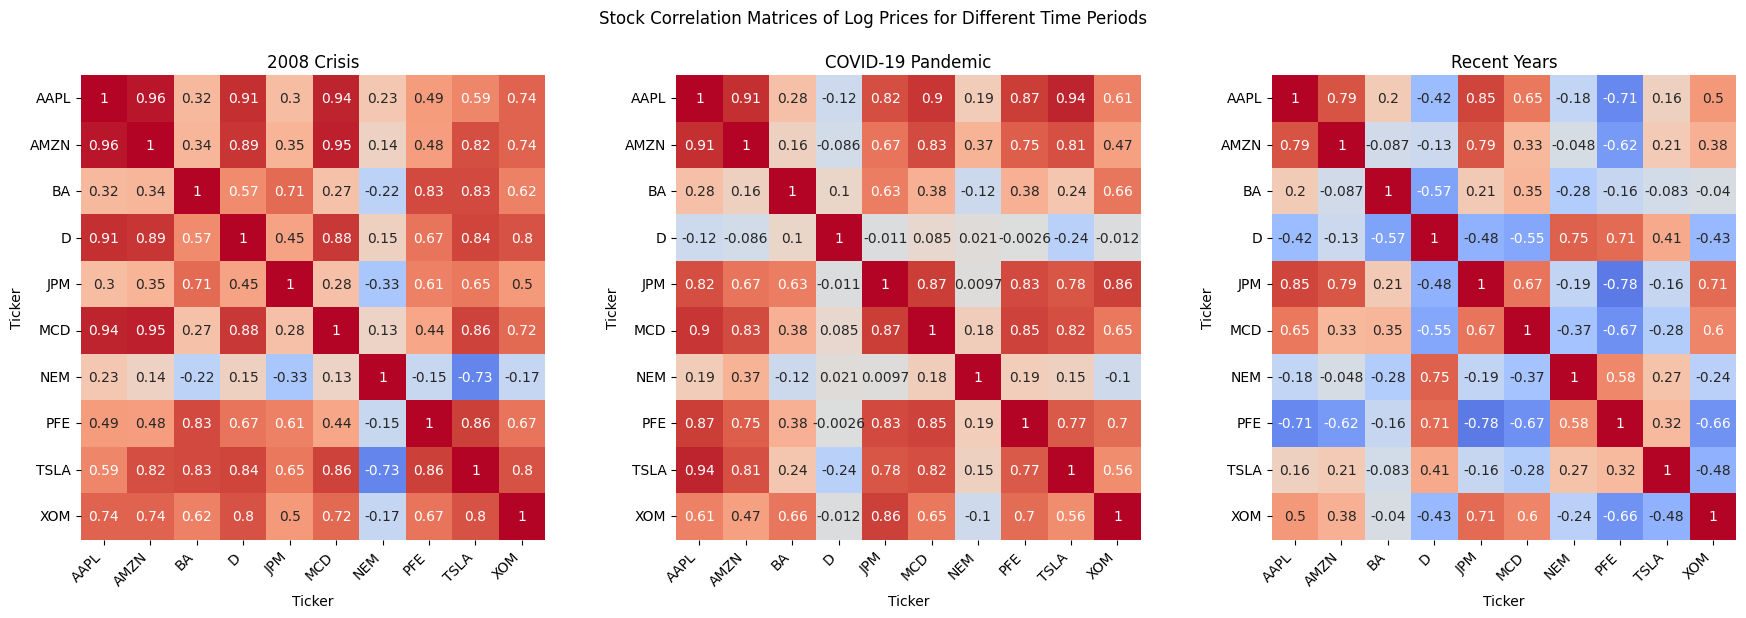

In [ ]:
# Part 1: Log Price Correlations
# Dictionary to hold log price data for each period
log_price_period_data = {}
for period, (start, end) in periods.items():
    log_price_period_data[period] = np.log(data.loc[start:end])

# Calculate and plot heatmaps for log price correlations
log_price_correlation_matrices = {period: pdata.corr(method='spearman') for period, pdata in log_price_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Stock Correlation Matrices of Log Prices for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_price_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

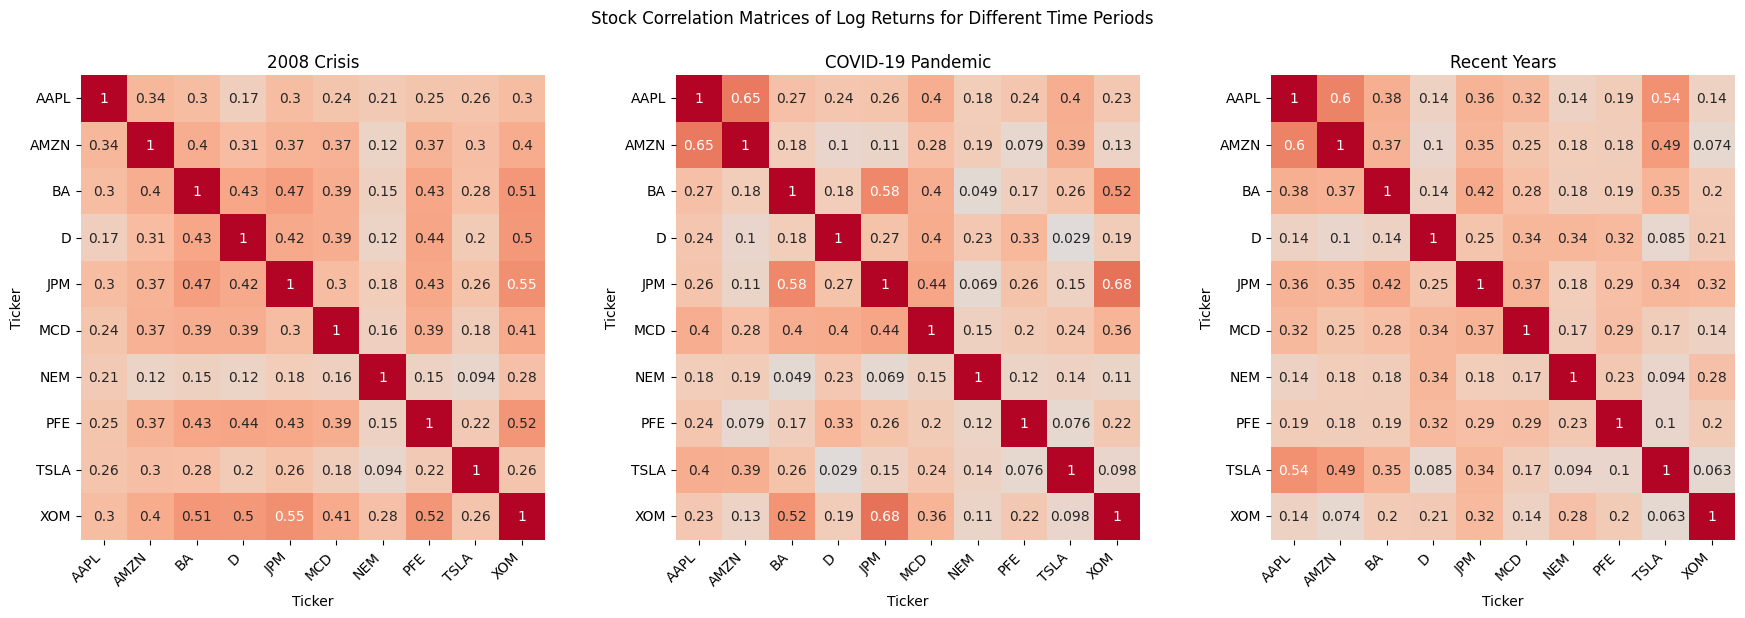

In [ ]:
# Part 2: Log Return Correlations
# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Dictionary to hold log return data for each period
log_return_period_data = {}
for period, (start, end) in periods.items():
    log_return_period_data[period] = log_returns.loc[start:end]

# Calculate and plot heatmaps for log return correlations
log_return_correlation_matrices = {period: pdata.corr(method='spearman') for period, pdata in log_return_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Stock Correlation Matrices of Log Returns for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_return_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Visualizing Positive and Negative Monotonic Correlations**

To further enhance our analysis, we generated scatter plots to visualize examples of **positive and negative monotonic correlations** between selected stock pairs. These scatter plots allow us to observe the nature of monotonic relationships, where two variables move in a consistent direction with respect to each other, regardless of the exact shape of the relationship.


1) **Purpose:**

The scatter plots help us understand how monotonic relationships appear graphically. Monotonic correlations indicate that as one variable (e.g., a stock’s price or return) increases, the other variable tends to increase or decrease consistently. Importantly, monotonic correlations do not imply a fixed linear relationship; they simply capture a consistent directional trend.

2) **Monotonic Correlation Examples:**

*   ***Positive Monotonic Correlation:*** We selected Apple (AAPL) and Amazon (AMZN) as an example of a positive monotonic correlation. In this case, as Apple’s prices or returns increase, Amazon’s also tend to increase, reflecting a consistent directional relationship both in the long term (prices) and the short term (log returns).
*   ***Negative Monotonic Correlation:*** For the negative monotonic correlation example, we used JPMorgan (JPM) and Pfizer (PFE). When analyzing log prices, we observe a negative monotonic relationship, where JPMorgan’s price increases tend to align with Pfizer’s price decreases over the long term. However, when we shift to log returns (short-term movements), this relationship changes to a positive monotonic correlation. This shift highlights how even pairs with negative long-term trends (as seen in prices) can exhibit positive short-term correlations due to market-wide factors affecting daily returns in the same direction.

3) **Non-Linear Trend Lines:**

*   To better illustrate these monotonic relationships, we fitted non-linear trend lines to the scatter plots using a **locally weighted scatterplot smoothing** (LOWESS) technique.
*   The non-linear trend lines help visualize that while the relationships are monotonic, they may **not be strictly linear**. The trend line emphasizes the direction of the correlation, positive or negative, without assuming a fixed shape, which aligns with the concept of monotonicity.



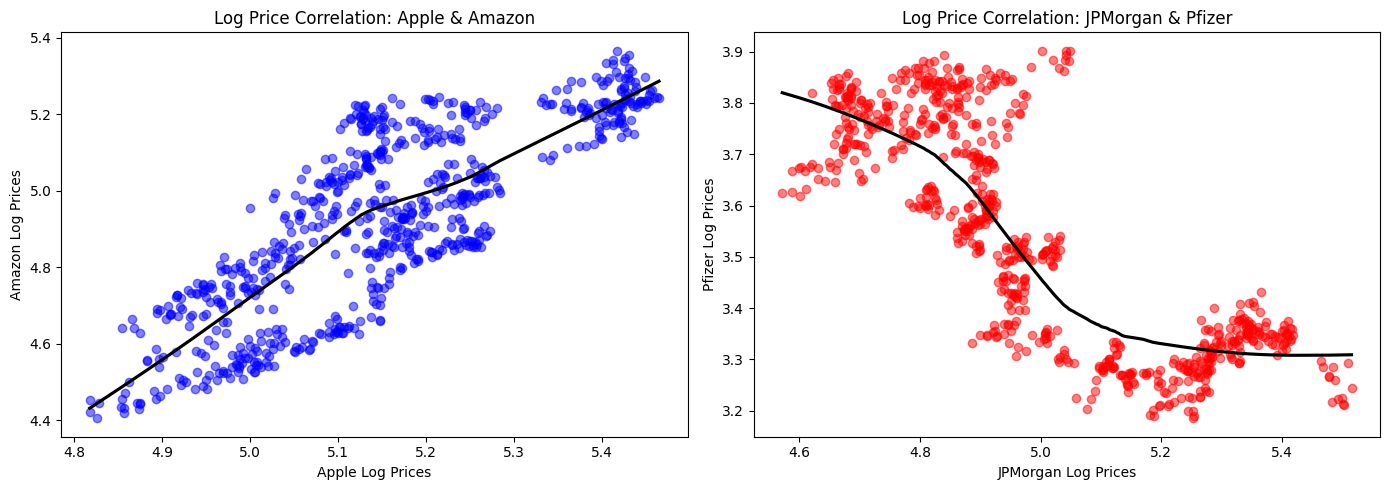

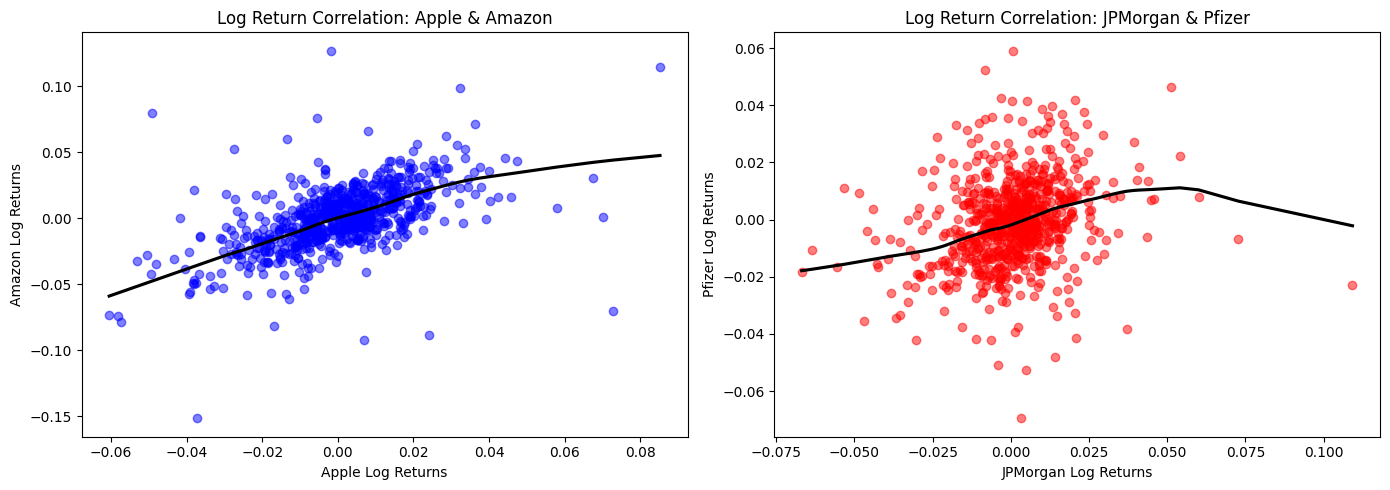

In [ ]:
# Part 3: Scatter Plots for Selected Pairs

# Scatter Plots for Log Prices
recent_log_price_data = log_price_period_data['Recent Years']
apple_amazon_log_prices = recent_log_price_data[['AAPL', 'AMZN']]
jpmorgan_pfizer_log_prices = recent_log_price_data[['JPM', 'PFE']]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Positive correlation: Apple and Amazon log prices
sns.regplot(x='AAPL', y='AMZN', data=apple_amazon_log_prices, ax=axes[0],
            scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
axes[0].set_title("Log Price Correlation: Apple & Amazon")
axes[0].set_xlabel('Apple Log Prices')
axes[0].set_ylabel('Amazon Log Prices')

# Negative correlation: JPMorgan and Pfizer log prices
sns.regplot(x='JPM', y='PFE', data=jpmorgan_pfizer_log_prices, ax=axes[1],
            scatter_kws={'color': 'red', 'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
axes[1].set_title("Log Price Correlation: JPMorgan & Pfizer")
axes[1].set_xlabel('JPMorgan Log Prices')
axes[1].set_ylabel('Pfizer Log Prices')

plt.tight_layout()
plt.show()

# Scatter Plots for Log Returns
recent_log_return_data = log_return_period_data['Recent Years']
apple_amazon_log_returns = recent_log_return_data[['AAPL', 'AMZN']]
jpmorgan_pfizer_log_returns = recent_log_return_data[['JPM', 'PFE']]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Positive correlation: Apple and Amazon log returns
sns.regplot(x='AAPL', y='AMZN', data=apple_amazon_log_returns, ax=axes[0],
            scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
axes[0].set_title("Log Return Correlation: Apple & Amazon")
axes[0].set_xlabel('Apple Log Returns')
axes[0].set_ylabel('Amazon Log Returns')

# Positive correlation: JPMorgan and Pfizer log returns
sns.regplot(x='JPM', y='PFE', data=jpmorgan_pfizer_log_returns, ax=axes[1],
            scatter_kws={'color': 'red', 'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
axes[1].set_title("Log Return Correlation: JPMorgan & Pfizer")
axes[1].set_xlabel('JPMorgan Log Returns')
axes[1].set_ylabel('Pfizer Log Returns')

plt.tight_layout()
plt.show()


**Correlation Dynamics over Time**

One of the key insights from this analysis is that **correlation between stocks is not static but can vary significantly over time**. By examining the log price movements of JPMorgan (JPM) and Pfizer (PFE) across three distinct periods (the 2008 Crisis, the COVID-19 Pandemic, and Recent Years) we observe how the relationship between these stocks has evolved in response to changing market conditions.

**1) 2008 Crisis:**

During the 2008 financial crisis, both JPMorgan and Pfizer faced extreme market pressures, and their **log price trends showed a similar pattern of decline and recovery.** This period shows how macroeconomic stress can lead to unique reactions among stocks, depending on their industry and business fundamentals.

**2) COVID-19 Pandemic:**

In the early stages of the COVID-19 pandemic, we again observe significant price movements, though **both stocks show a more synchronized initial drop**. The healthcare sector, represented by Pfizer, later stabilized and began to recover as it played a critical role in pandemic response. JPMorgan, representing the financial sector, also recovered but with different timing and magnitude. This reflects sector-specific dynamics, even during a common external shock.

**3) Recent Years:**

In the most recent period, the correlation appears to shift notably. While **JPMorgan's** log price trend shows a general **upward trajectory**, **Pfizer's** log prices show a **relative decline**. This divergence highlights how, over time, factors such as sector performance, business decisions, and economic policy can influence each stock differently, resulting in changing correlations.

**Key Insight**

These observations underscore an important point in financial analysis: **correlation** between assets is **dynamic** and **can fluctuate** significantly depending on external conditions and sector-specific factors. This variability is crucial for portfolio management, as assets that may have been positively or negatively correlated in the past might exhibit very different relationships in the future. Recognizing this fluid nature of correlation is essential for effective diversification and risk management.

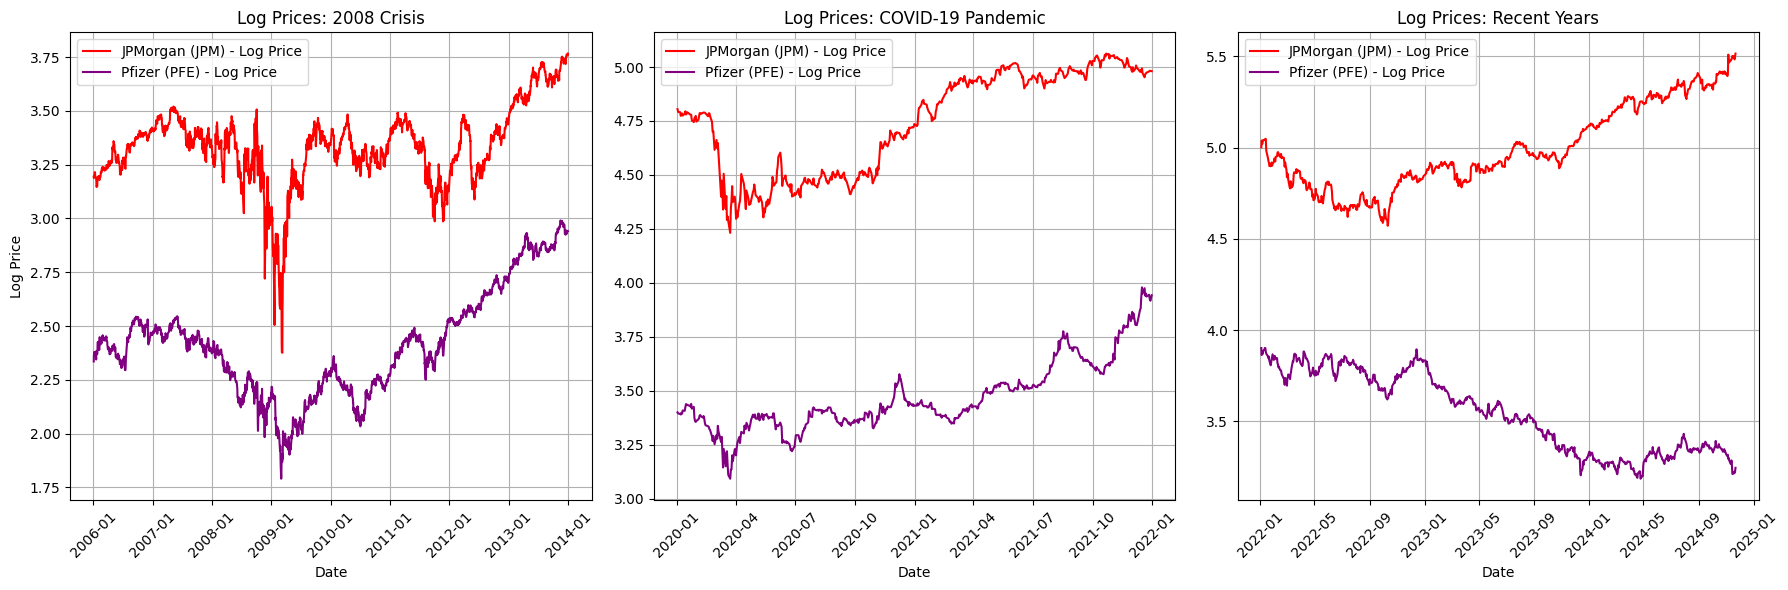

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Define log price data for each period for JPMorgan and Pfizer
log_price_2008 = log_price_period_data['2008 Crisis'][['JPM', 'PFE']]
log_price_covid = log_price_period_data['COVID-19 Pandemic'][['JPM', 'PFE']]
log_price_recent = log_price_period_data['Recent Years'][['JPM', 'PFE']]

# Set up the matplotlib figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Define date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m')

# Plot for 2008 Crisis
axes[0].plot(log_price_2008.index, log_price_2008['JPM'], label='JPMorgan (JPM) - Log Price', color='red')
axes[0].plot(log_price_2008.index, log_price_2008['PFE'], label='Pfizer (PFE) - Log Price', color='purple')
axes[0].set_title('Log Prices: 2008 Crisis')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Price')
axes[0].legend()
axes[0].grid(True)
axes[0].xaxis.set_major_formatter(date_format)
axes[0].tick_params(axis='x', rotation=45)

# Plot for COVID-19 Pandemic
axes[1].plot(log_price_covid.index, log_price_covid['JPM'], label='JPMorgan (JPM) - Log Price', color='red')
axes[1].plot(log_price_covid.index, log_price_covid['PFE'], label='Pfizer (PFE) - Log Price', color='purple')
axes[1].set_title('Log Prices: COVID-19 Pandemic')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True)
axes[1].xaxis.set_major_formatter(date_format)
axes[1].tick_params(axis='x', rotation=45)

# Plot for Recent Years
axes[2].plot(log_price_recent.index, log_price_recent['JPM'], label='JPMorgan (JPM) - Log Price', color='red')
axes[2].plot(log_price_recent.index, log_price_recent['PFE'], label='Pfizer (PFE) - Log Price', color='purple')
axes[2].set_title('Log Prices: Recent Years')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True)
axes[2].xaxis.set_major_formatter(date_format)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Kendall's tau correlation**

As the Spearman, the Kendall's tau correlations is a non-parametric measure of the monotonic relationship between two variables. In order to do this it compares pairs of observations. Let's see what this means.
Let $x_1, …, x_n$ be a sample for the variable $X$ and let $y_1, …, y_n$ be a sample for the variable $Y$ of the same size $n$.
A pair of of observations ($x_i, x_j$) and ($y_i, y_j$) is classified as:
* concordant if $(x_i > x_j$ and $y_i > y_j)$ or $(x_i < x_j$ and $y_i < y_j)$

* discordant if $(x_i > x_j$ and $y_i < y_j)$ or $(x_i < x_j$ and $y_i > y_j)$

* tied if $x_i = x_j$ and/or $y_i = y_j$. Tied pairs are neither concordant nor discordant.

Different versions of Kendall's Tau exist, depending on whether they account for tied pairs.

In the absence of ties, the Kendall $\tau$ coefficient is defined as

\begin{align}
\tau = \frac{n_c - n_d}{n_0}
\end{align}

Where:
- $n_c$ = Number of concordant pairs
- $n_d$ = Number of discordant pairs
- $n_0 = \frac{n(n-1)}{2}$ = Total number of pairs


This quantity reaches its maximum value ($\tau=1$) when $n_d=0$, meaning all pairs are concordant. This reflects the definition of a perfect increasing monotonic relationship between X and Y. Conversely, this quantity reaches its minimum value ($\tau=-1$) when $n_c=0$, meaning all pairs are discordant. This reflects the definition of a perfect decreasing monotonic relationship between X and Y.
So that's why this object measures the monotonic relationship between two (random) variables. \
Like Spearman, Kendall's Tau is less sensitive to outliers and measures, as we have just understood, monotonic (either linear and non-linear) relationships between variables.

# Kendall's tau calculation example

Suppose we have the following data for two variables, $X$ and $Y$:

| Observation | $X$ | $Y$ |
|-------------|-----|-----|
| 1           | 1   | 2   |
| 2           | 2   | 3   |
| 3           | 3   | 1   |
| 4           | 4   | 4   |

---

## Step 1: Count all pairs

The total number of pairs is:

$$
n_0 = \frac{n(n-1)}{2} = \frac{4(4-1)}{2} = 6
$$

---

## Step 2: Classify pairs

### Concordant pairs:
- Pair (1, 2): $X_1 < X_2$ and $Y_1 < Y_2$
- Pair (1, 4): $X_1 < X_4$ and $Y_1 < Y_4$
- Pair (2, 4): $X_2 < X_4$ and $Y_2 < Y_4$

**Total concordant pairs:** $n_c = 3$

### Discordant pairs:
- Pair (1, 3): $X_1 < X_3$ but $Y_1 > Y_3$
- Pair (2, 3): $X_2 < X_3$ but $Y_2 > Y_3$

**Total discordant pairs:** $n_d = 2$

### Tied pairs:
No tied pairs exist here ($x_i \neq x_j$ and $y_i \neq y_j$ for all $i, j$).

---

## Tau

Using the formula for Tau:

$$
\tau= \frac{n_c - n_d}{n_0} = \frac{3 - 2}{6} = \frac{1}{6} \approx 0.167
$$

This indicates a weak positive monotonic relationship between $X$ and $Y$.


The following formula adjusts for tied pairs in both variables X  and Y:

\begin{align}
\tau = \frac{n_c - n_d}{\sqrt{(n_0 - n_1)(n_0 - n_2)}}
\end{align}

Where:
- $n_c$ = Number of concordant pairs
- $n_d$ = Number of discordant pairs
- $n_0 = \frac{n(n-1)}{2}$ = Total number of pairs
- $n_1 = \sum_i t_i (t_i - 1)/2$ = Correction for ties in X
- $n_2 = \sum_j u_j (u_j - 1)/2$ = Correction for ties in Y
- $t_i$ = Number of tied values in the $i^\text{th}$ group for X
- $u_j$ = Number of tied values in the $j^\text{th}$ group for Y




Let us now plot, for both log prices and log returns, the correlation matrices for the three chosen time intervals.

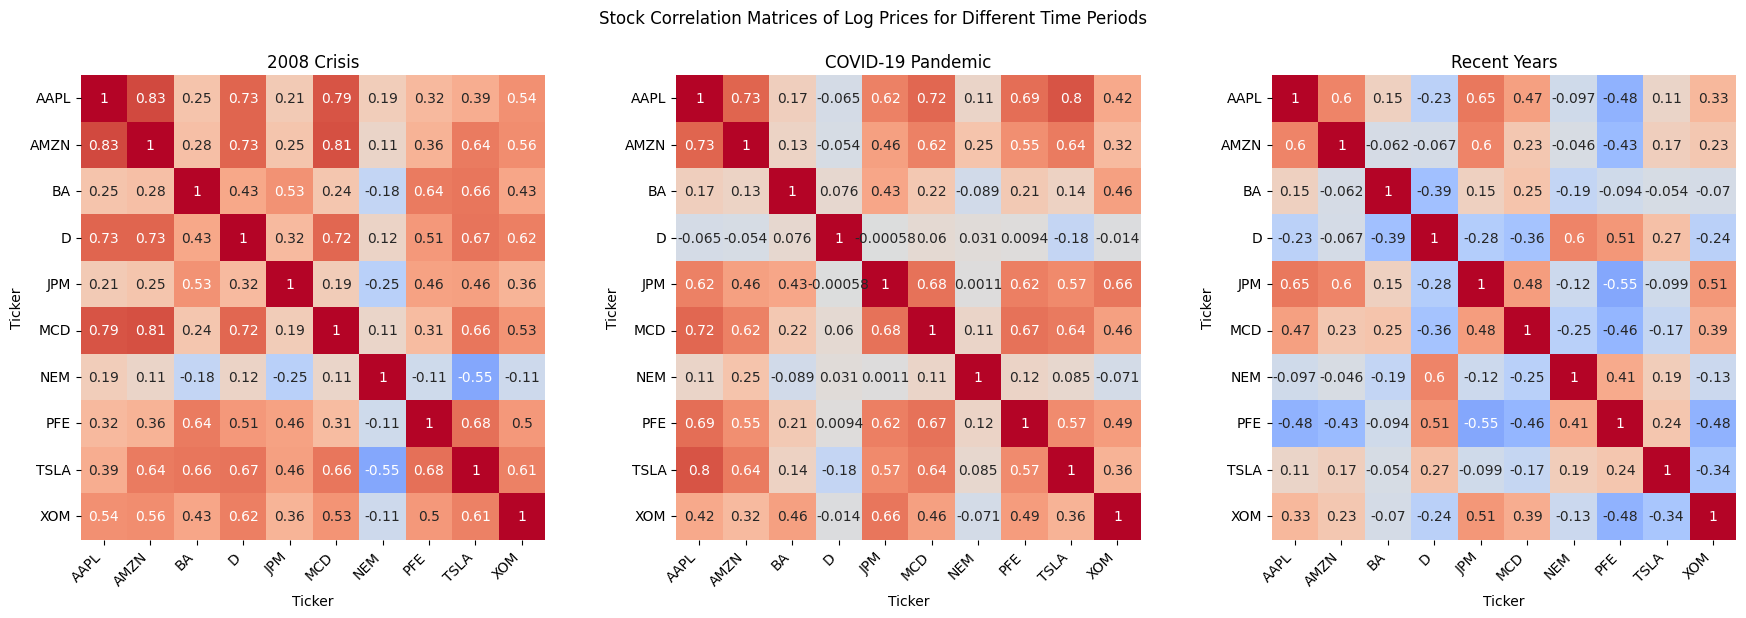

In [ ]:
# Part 1: Log Price Correlations
# Dictionary to hold log price data for each period
log_price_period_data = {}
for period, (start, end) in periods.items():
    log_price_period_data[period] = np.log(data.loc[start:end])  # Take log of prices

# Calculate and plot heatmaps for log price correlations
log_price_correlation_matrices = {period: pdata.corr(method='kendall') for period, pdata in log_price_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Stock Correlation Matrices of Log Prices for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_price_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

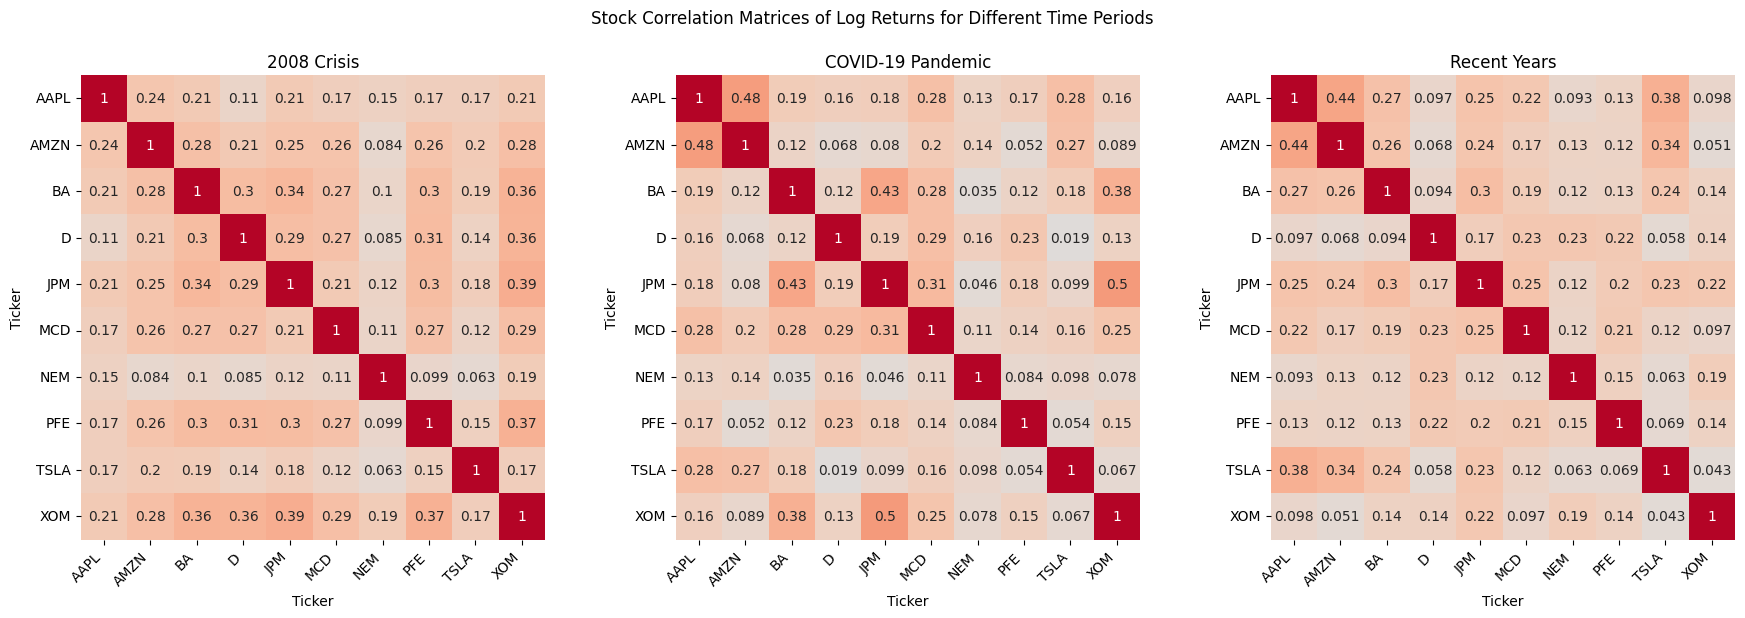

In [ ]:
# Part 2: Log Return Correlations
# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Dictionary to hold log return data for each period
log_return_period_data = {}
for period, (start, end) in periods.items():
    log_return_period_data[period] = log_returns.loc[start:end]

# Calculate and plot heatmaps for log return correlations
log_return_correlation_matrices = {period: pdata.corr(method='kendall') for period, pdata in log_return_period_data.items()}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=False)
fig.suptitle('Stock Correlation Matrices of Log Returns for Different Time Periods')

for ax, (period, corr_matrix) in zip(axes.flat, log_return_correlation_matrices.items()):
    sns.heatmap(corr_matrix, ax=ax, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm', cbar=False)
    ax.set_title(period)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, horizontalalignment='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Let's see how **Spearman's and Kendall's Tau** measures perfectly capture **non-linear relationships** between two variables, **while Pearson's does not**.

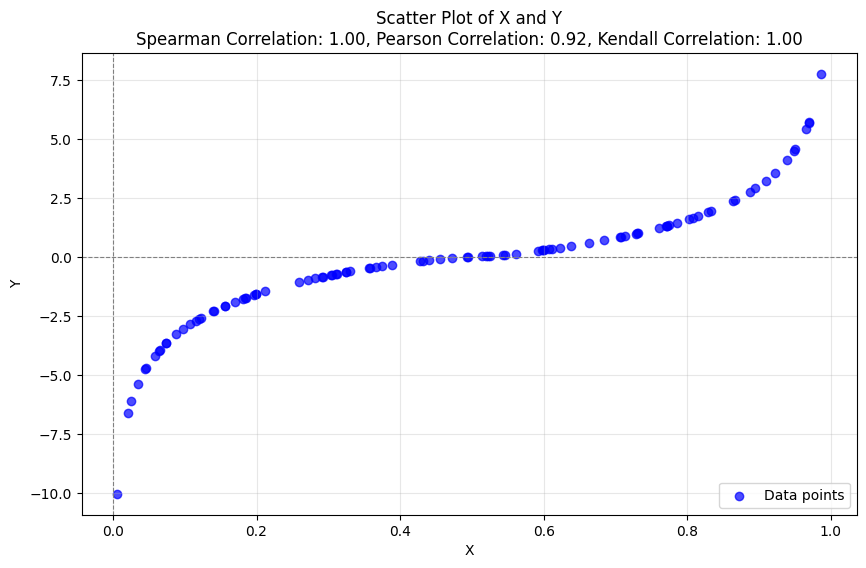

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau

# Generate data
np.random.seed(42)  # Set seed for reproducibility
X = np.random.uniform(size=100)
Y = np.log(X / (1 - X))
Y = np.sign(Y) * np.abs(Y) ** 1.4

# Calculate Spearman, Kendall's Tau and Pearson correlations
spearman_corr, _ = spearmanr(X, Y)
pearson_corr, _ = pearsonr(X, Y)
kendall_corr, _ = kendalltau(X, Y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, label='Data points', color='blue')
plt.title(
    f"Scatter Plot of X and Y\nSpearman Correlation: {spearman_corr:.2f}, "
    f"Pearson Correlation: {pearson_corr:.2f}, Kendall Correlation: {kendall_corr:.2f}"
)
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Let's now see how **Spearman's and Kendall's** Tau measures **perfectly capture linear relationships** (being these relationships monotone as well) between two variables, **as Pearson does**.

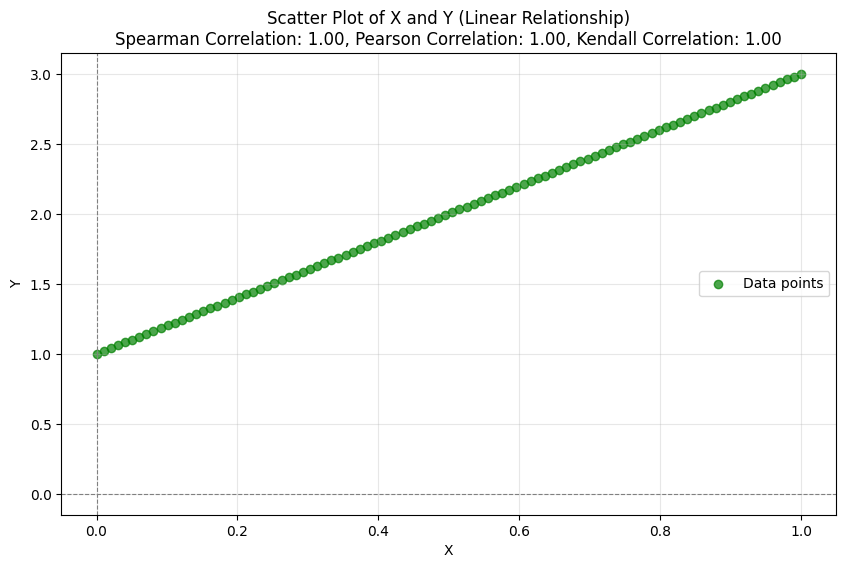

In [ ]:
# Generate a linear relationship
X = np.linspace(0, 1, 100)  # Linearly spaced values
Y = 2 * X + 1  # Linear relationship: Y = 2X + 1

# Calculate correlations
spearman_corr, _ = spearmanr(X, Y)
pearson_corr, _ = pearsonr(X, Y)
kendall_corr, _ = kendalltau(X, Y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, label='Data points', color='green')
plt.title(
    f"Scatter Plot of X and Y (Linear Relationship)\nSpearman Correlation: {spearman_corr:.2f}, "
    f"Pearson Correlation: {pearson_corr:.2f}, Kendall Correlation: {kendall_corr:.2f}"
)
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(alpha=0.3)
plt.show()